# Inaugural Project 

## Imports

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import itertools
from tabulate import tabulate


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass

## Question 1

We iterate over the 3x3 combinations of parameter values and solve the discrete model, finding the values of HF/HM for each parameter value combination. The relationship is illustrated in a matrix.

In [2]:
# a. Solving the model

OurModel = HouseholdSpecializationModelClass()

arsigma=np.array([0.5,1,1.5]) 

aralpha=np.array([0.25,0.5,0.75])

result2=[]
for k,v in itertools.product(arsigma,aralpha): #for all combinations in the two arrays
    OurModel.par.sigma=k #values from the first array is used as sigma parameters in the model
    OurModel.par.alpha=v #values from second array used as alpha parameters
    temp=OurModel.solve_discrete() #naming the solution function
    result2.append(temp.g) #appending the solutions of the variable "g"(HF/HM) to the empty list "result2"

In [3]:

# b. Illustrating results

# i. Changing the solution matrix from 9x1 list to 3x3 dataframe and adding alpha and sigma as rows and columns
ser=pd.Series(result2)
ser2=ser.values.reshape((3,3))
df=pd.DataFrame(ser2, index=[arsigma], columns=[aralpha])

# ii. Style
s=pd.concat( #creating a dataframe with concatenated row and column titles, and saving it as "s"
    [pd.concat(
    [df],
    keys=['alpha'], axis=1)],
    keys=['sigma'])

cm = sns.light_palette('blue', as_cmap=True) #creating and naming a color palette
s.style.\
    set_caption('Table 0 - values of HF/HM for certain parameter value combinations').\
    background_gradient(cmap=cm, axis=None).\
    format_index(axis=0,precision=2).\
    format_index(axis=1, precision=2).\
    format(precision=4) #styling the "s" dataframe with caption, background color gradient, and formatting decimals

## Question 2

We solve the model for the 5 parameter values of wF and produce the resulting values of HF/HM and wF/wM. The relationship is illustrated in a graph.

In [4]:

# a. Solving the model

OurModel2 = HouseholdSpecializationModelClass()

arwF=np.array([0.8,0.9,1.0,1.1,1.2]) #array of values that wF can take for the question


result3=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel2.par.wF=k
    temp=OurModel2.solve_discrete()
    result3.append(temp.g)

result3a=np.log(result3)

print(result3a)

result4=[] 
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel2.par.wF=k
    temp=OurModel2.solve_discrete()
    result4.append(temp.h)

result4a=np.log(result4)

print(result4a)

[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


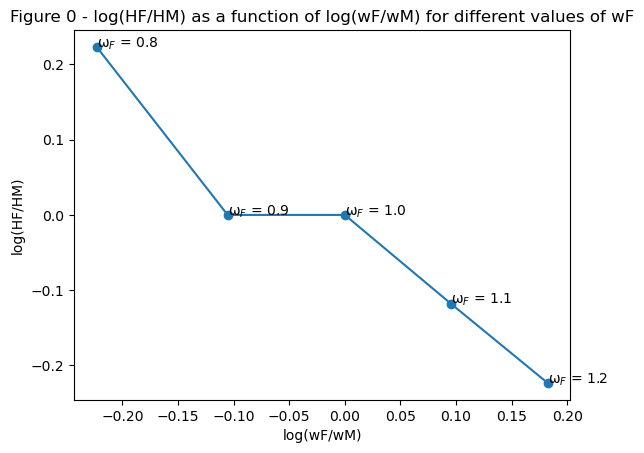

In [5]:
# b. Illustrating the results

plt.plot(result4a, result3a, marker='o')
plt.title('Figure 0 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result4a[i],result3a[i]))

plt.show()

## Question 3

Same approach as question 2, but now solved using the continuous function.

In [6]:
# a. solving the model
OurModel3 = HouseholdSpecializationModelClass()

result5=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel3.par.wF=k
    temp=OurModel3.solve()
    result5.append(temp.g)


result5a=np.log(result5)
print(result5a)



result6=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel3.par.wF=k
    temp=OurModel3.solve()
    result6.append(temp.h)

result6a=np.log(result6)
print(result6a)

[ 2.23143643e-01  1.05360372e-01  1.25199162e-09 -9.53102744e-02
 -1.82321545e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


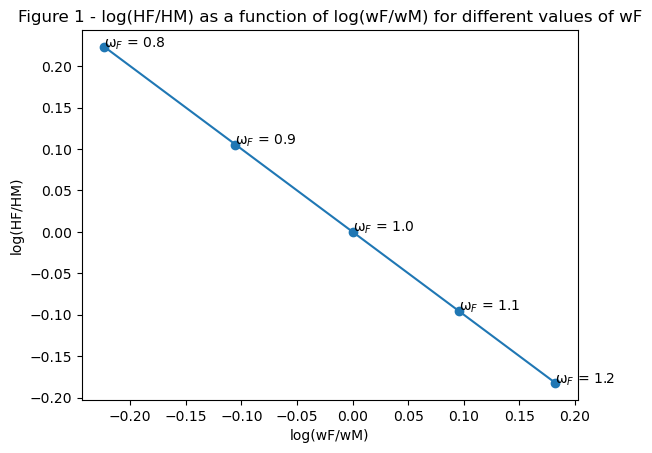

In [7]:
# b. illustrating results
plt.plot(result6a, result5a, marker='o')
plt.title('Figure 1 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result6a[i],result5a[i]))

plt.show()

## Question 4

Running the function "estimate" which minimizes the sum of squares between the "true values" of Siminski and Yetsenga and the values produced by iterating over different alpha and sigma.

In [8]:

# a. minimizing the sum of squares and printing corresponding values

OurModel4 = HouseholdSpecializationModelClass()

temp1=OurModel4.estimate()


print(f'α: {temp1.alpha}')
print(f'σ: {temp1.sigma}')

print(f'sum of squares: {OurModel4.deviation(temp1.alpha, temp1.sigma)}')

α: 0.9999999999998997
σ: 0.013453124999999996
sum of squares: 0.007497469578392549


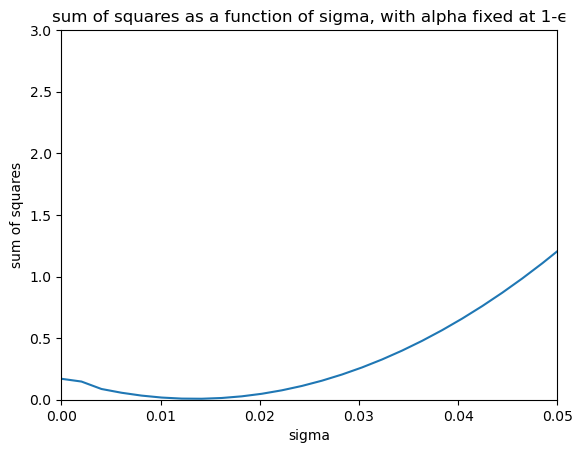

In [9]:

# b. illustrating the relationship between sigma and the sum of squares, with alpha assumed to be 1-ϵ

from mpl_toolkits.mplot3d import Axes3D
sigmalist2 = np.linspace(0,0.2,100)
error2=np.zeros(100)
for i, sigma in enumerate(sigmalist2): #finding the sum of squares for 100 values of sigma, with alpha fixed at the proposed minimizing solution
     
    OurModel4.par.sigma=i 
    temp1=OurModel4.deviation(0.9999999999999, sigma) 
    error2[i] = temp1

fig2 = plt.figure()

ax = fig2.add_subplot(1,1,1)

ax.plot(sigmalist2, error2)

ax.set_xlim(0,0.05)

ax.set_ylim(0,3)

ax.set_title('sum of squares as a function of sigma, with alpha fixed at 1-ϵ')
ax.set_xlabel('sigma')
ax.set_ylabel('sum of squares')

plt.show(ax)

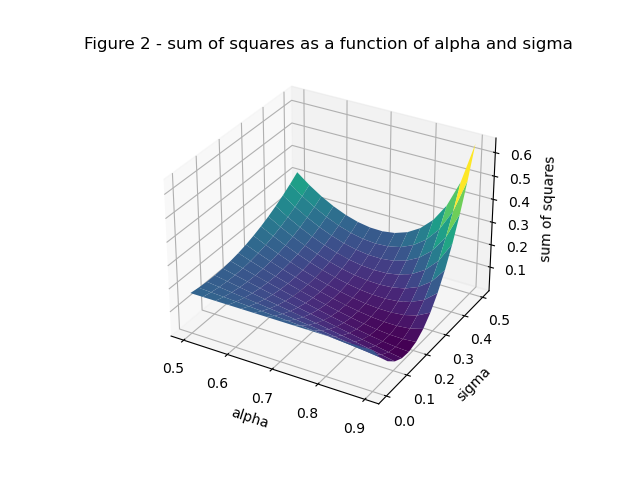

In [10]:

# c. illustrating the 3-way relationship near the proposed solution, also used to search for candidate ranges for the minimization function

alphalist = np.linspace(0.5,0.9,15)
sigmalist = np.linspace(0,0.5,15)

errorvalues = np.zeros((15, 15))
for i, alpha in enumerate(alphalist): #finding the sum of squares for 15x15 combinations of alpha and sigma near the proposed minimum
    for j, sigma in enumerate(sigmalist):
        OurModel4.par.alpha=i 
        OurModel4.par.sigma=j 
        temp1=OurModel4.deviation(alpha, sigma) 
        errorvalues[i,j] = temp1

from mpl_toolkits.mplot3d import Axes3D as ax
%matplotlib widget

# a. plot
alphaspace, sigmaspace = np.meshgrid(alphalist,sigmalist,indexing='ij')

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.plot_surface(alphaspace,sigmaspace,errorvalues, cmap='viridis')

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('sum of squares')
ax.set_title('Figure 2 - sum of squares as a function of alpha and sigma')

plt.show()

α = 0.9999999999998997

σ =  0.013453124999999996

sum of squares = 0.007497469578392549

The alpha and sigma values that produce results nearest the ones arrived at by Siminski and Yetsenga (2022) imply a function where:
 1. because of an alpha value approaching 1, female home productivity is very high relative to male, likely asymptotically approaching infinity.
 
 2. due to a low elasticity of substitution, male labor in the home is not easily replaced by female labor (and vice versa), so increasing the input ratio of female to male labor will decrease female productivity significantly. 

In the end, because alpha appears to be asymptotically approaching 1 in the solution, it is likely dominating the second effect, so the end result is that females are more productive at any level of hours worked at home. 

## Question 5

Since the relationship in question is the division of household chores and its relationship to relative market wages, we considered an extension to the model that accounts for household preferences regarding male contra female household work. However, we believe that the modelled gender productivity in the home production function can just as well be interpreted as a home production gender preference, so we did not go that way. 
Instead, we decide to model divergent preferences as regards overall time spent working, represented by ϵ (epsilon) in the maximization problem. 

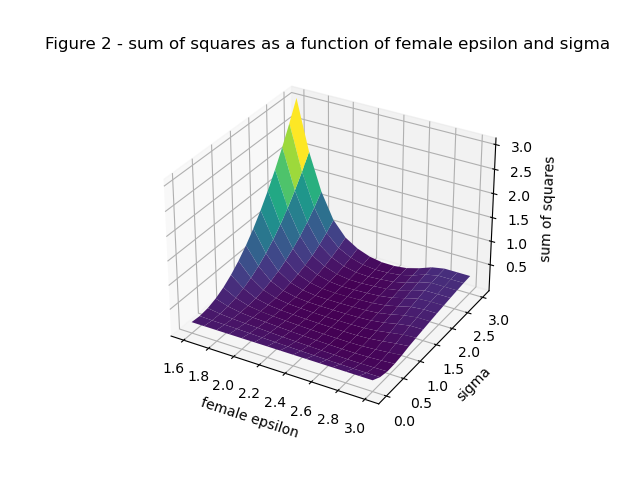

In [4]:

# a. Using 3D plots to search for candidate ranges to input to the godawful minimization function

OurModel5 = HouseholdSpecializationModelClass()

epsilonlist = np.linspace(1.6,3,15)
sigmalistext = np.linspace(0,3,15)



errorvalues1 = np.zeros((15, 15))
for i, epsilonf in enumerate(epsilonlist): 
    for j, sigma in enumerate(sigmalistext):
        OurModel5.par.epsilonf=i 
        OurModel5.par.sigma=j 
        temp1=OurModel5.deviation_ext(epsilonf, sigma) 
        errorvalues1[i,j] = temp1



from mpl_toolkits.mplot3d import Axes3D as ax
%matplotlib widget

# a. plot
epsilonspace, sigmaspaceext = np.meshgrid(epsilonlist,sigmalistext,indexing='ij')


fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.plot_surface(epsilonspace,sigmaspaceext,errorvalues1, cmap='viridis')

# b. add labels
ax.set_xlabel('female epsilon')
ax.set_ylabel('sigma')
ax.set_zlabel('sum of squares')
ax.set_title('Figure 2 - sum of squares as a function of female epsilon and sigma')

plt.show()

In [18]:

# b. Minimizing within likely bounds and printing corresponding values

temp1=OurModel5.estimate_ext()


print(f'ϵ: {temp1.epsilonf}')
print(f'σ: {temp1.sigma}')

print(f'sum of squares: {OurModel5.deviation_ext(temp1.epsilonf, temp1.sigma)}')

ϵ: 2.3999999999999995
σ: 1.2389604487285184
sum of squares: 0.0008272584119218836


The sum of squares is smaller than without fixed alpha and without female epsilon.

The elasticity of substitution is now above 1, which implies that output increases more than the relative drop in productivity when the input ratio changes. This means it pays off to increase the hours worked of women above men and vice versa. 

The female isoelastic coefficient ϵ of the disutility of work function is quite high. With male isoelasticity fixed at 1, this implies that females are less work shy than males. That is, the household receives less marginal disutility of work from females relative to males at any level of work. The result is unsurprising, given that the target parameters of the Siminski and Yetsenga regression imply that women work more than men at home.